In [23]:
# import required libraries

# this is for visiualization
import matplotlib.pyplot as plt
import numpy as np
#this our main library SKLEARN and its required modules
from sklearn import datasets, svm

In [2]:
# load the inbuild dataset
digits = datasets.load_digits()

In [3]:
#it's important to know your data
#so lets see whats inside digits..
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
# so first of all we have data array
# let's explore it
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
# its length
len(digits.data)

1797

In [6]:
#let's see what's at the last of data array
digits.data[1796]

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

In [7]:
#have a look at digits data last element type,shape and size.
print(type(digits.data[1796]))
print(digits.data[1796].shape)
digits.data[1796].size

<class 'numpy.ndarray'>
(64,)


64

In [8]:
# So are size and shape same?
# The ans is no

# convert the data to a 2d array for viewing purpose

temp = digits.data[1796].reshape(8,8)  # 8 * 8 will give 64 again
print(temp.shape)
temp.size

(8, 8)


64

In [9]:
# how the last element array look's now
temp

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

label: 8


<Figure size 432x288 with 0 Axes>

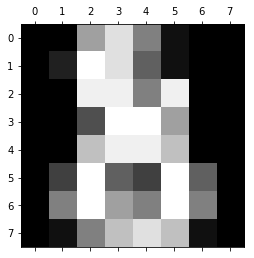

In [10]:
# lets see how the image looks
plt.gray() #just for the color of graph background
# plt.summer()
print("label:",digits.target[1796])
plt.matshow(temp)
plt.show()

In [11]:
# contains all possible answer
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# images array in our digits dataset contains same values as in data but 
# it is already reformmated to a 8 * 8 numpy array
digits.images[1796]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

label: 8


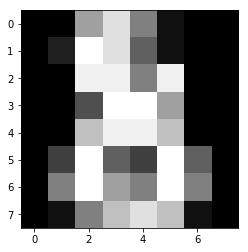

In [13]:
plt.gray()
print("label:",digits.target[1796])
# plt.matshow(digits.images[1796])
plt.imshow(digits.images[1796]) # this can also be used
plt.show()

In [14]:
# for simplification

images = digits.data
labels = digits.target

In [15]:
# now let's start building our model
# 1st divide our model into to parts train and test usally it's a 70% train and 30% test but 
# depending on coditions it may varry

from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(digits.data, labels, test_size = 0.3)

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1257, 64)
(1257,)
(540, 64)
(540,)


In [17]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

[Detail about SVM and it's various parameter]("https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/")

In [18]:
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
result = classifier.predict(x_test[539].reshape(1,-1))
result

array([5])

In [20]:
y_test[539]

5

In [24]:
classifier.score(x_test,y_test)

0.9944444444444445

<Figure size 432x288 with 0 Axes>

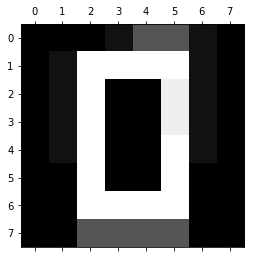

array([0])

In [25]:
# lets create our own zero array to see if it recognise other numbers
zero = np.array([[ 0.,  0., 0., 1., 5., 5., 1., 0.],
                    [ 0.,  1., 15., 15., 15., 15., 1, 0.],
                    [ 0.,  1., 15., 0., 0., 14., 1., 0.],
                    [ 0.,  1., 15., 0., 0., 14., 1., 0.],
                    [ 0.,  1., 15., 0., 0., 15., 1., 0.],
                    [ 0.,  0., 15., 0., 0., 15., 0., 0.],
                    [ 0.,  0., 15., 15., 15., 15., 0., 0.],
                    [ 0.,  0., 5., 5., 5., 5., 0., 0.]])
plt.gray()
plt.matshow(zero)
plt.show()
classifier.predict(zero.reshape(1,-1))
